In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1fI-7ghGbf-ULTTs1AphfEEsvCS6nHht6
!unzip -qq 'images_mr.zip'

images = []

for index in tqdm(range(9908)):
    img = image.load_img('images_mr/%d.jpg' % (index), target_size=(86, 128))
    img_np = image.img_to_array(img)
    images.append(img_np)

images_np = np.array(images)

# save dataset
np.save('images_mr.npy', images_np)

Downloading...
From: https://drive.google.com/u/0/uc?id=1fI-7ghGbf-ULTTs1AphfEEsvCS6nHht6
To: /content/images_mr.zip
36.2MB [00:00, 163MB/s]
replace images_mr/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


100%|██████████| 9908/9908 [00:04<00:00, 2103.43it/s]


# VGG16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


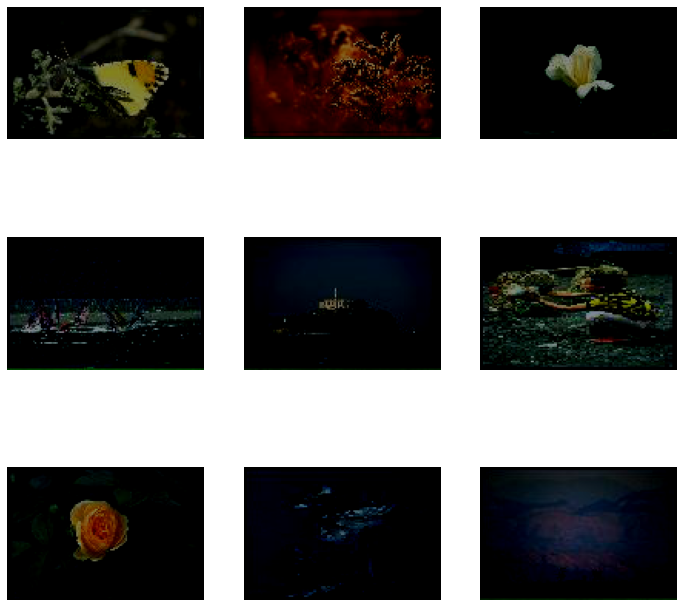

In [ ]:
# Load data
data = np.load('images_mr.npy', allow_pickle=True)

# Load pretrained model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(86, 128, 3))

# compute features
data_features = tf.keras.applications.vgg16.preprocess_input(data)
data_features = model.predict(data_features)

# compute feature for query
query = image.load_img('/content/images_mr/0.jpg', target_size=(86, 128))
query_features = image.img_to_array(query)
query_features = np.expand_dims(query_features, axis=0)
query_features = tf.keras.applications.vgg16.preprocess_input(query_features)
query_features = model.predict(query_features)

# Prepare for computing correlation
query_features = query_features.reshape(1, -1)
data_features  = data_features.reshape(data.shape[0], -1)

# compute correlation
query_features = np.broadcast_to(query_features, data_features.shape)
corr_list = list(map(pearsonr, query_features, data_features))

# sort correlation list
tps = zip(corr_list, range(data_features.shape[0]))
tps_sorted = sorted(tps, key = lambda item: item[0], reverse=True)

# show pictures
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]

    img = data[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img/255.0)

# InceptionV3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


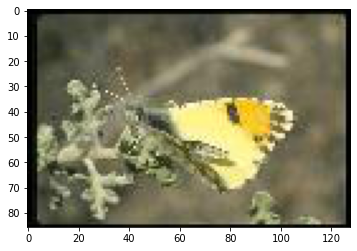

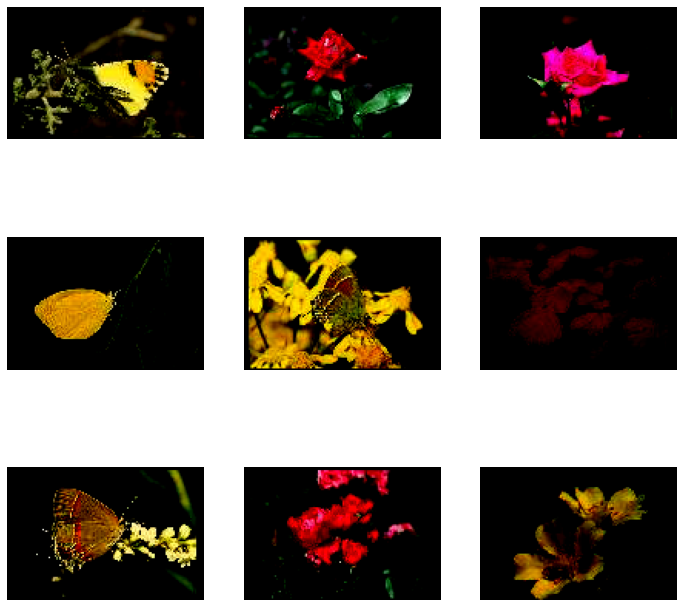

In [ ]:
# Load data
data = np.load('images_mr.npy', allow_pickle=True)

# Load pretrained model
model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(86, 128, 3))

# compute features
data_features = tf.keras.applications.inception_v3.preprocess_input(data)
data_features = model.predict(data_features)

# compute feature for query
query = image.load_img('/content/images_mr/0.jpg', target_size=(86, 128))
query_features = image.img_to_array(query)
query_features = np.expand_dims(query_features, axis=0)
query_features = tf.keras.applications.inception_v3.preprocess_input(query_features)
query_features = model.predict(query_features)
plt.imshow(query)
# Prepare for computing correlation
query_features = query_features.reshape(1, -1)
data_features  = data_features.reshape(data.shape[0], -1)

# compute correlation
query_features = np.broadcast_to(query_features, data_features.shape)
corr_list = list(map(pearsonr, query_features, data_features))

# sort correlation list
tps = zip(corr_list, range(data_features.shape[0]))
tps_sorted = sorted(tps, key = lambda item: item[0], reverse=True)

# show pictures
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]

    img = data[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img)

# EfficientNet

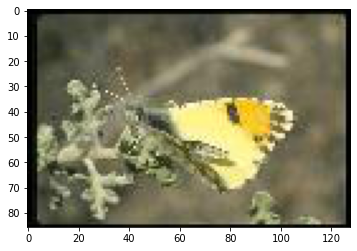

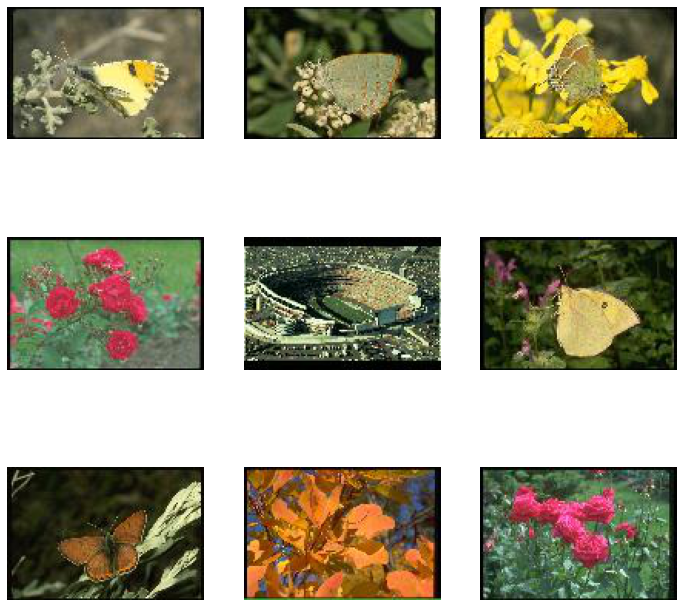

In [ ]:
# Load data
data = np.load('images_mr.npy', allow_pickle=True)

# Load pretrained model
model = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(86, 128, 3))

# compute features
data_features = tf.keras.applications.efficientnet.preprocess_input(data)
data_features = model.predict(data_features)

# compute feature for query
query = image.load_img('/content/images_mr/0.jpg', target_size=(86, 128))
query_features = image.img_to_array(query)
query_features = np.expand_dims(query_features, axis=0)
query_features = tf.keras.applications.efficientnet.preprocess_input(query_features)
query_features = model.predict(query_features)
plt.imshow(query)
# Prepare for computing correlation
query_features = query_features.reshape(1, -1)
data_features  = data_features.reshape(data.shape[0], -1)

# compute correlation
query_features = np.broadcast_to(query_features, data_features.shape)
corr_list = list(map(pearsonr, query_features, data_features))

# sort correlation list
tps = zip(corr_list, range(data_features.shape[0]))
tps_sorted = sorted(tps, key = lambda item: item[0], reverse=True)

# show pictures
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]

    img = data[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img/255.0)